In [1]:
# Install packages
!pip install pandas matplotlib numpy scipy pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.6 MB/s eta 0:00:00


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from sklearn.metrics import mean_squared_error
from math import sqrt

In [7]:
# Load dataset
url = "https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/HCLTECH.csv"
df = pd.read_csv("HCLTECH.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-24,406.500000,412.000000,404.625000,409.774994,368.495819,1373968
1,2017-04-25,412.000000,412.924988,406.799988,409.975006,368.675720,2194602
2,2017-04-26,410.950012,411.000000,398.274994,400.125000,359.817932,1918248
3,2017-04-27,398.500000,410.000000,398.100006,404.850006,364.066956,5640334
4,2017-04-28,406.450012,410.000000,399.875000,407.049988,366.045227,2794138


In [24]:
import pandas as pd

# Import data
url = 'https://raw.githubusercontent.com/haidar-rifki/Time-Series/main/HCLTECH.csv'
data = pd.read_csv("HCLTECH.csv")

# Exploratory Data Analysis
print(type(data))
print(data.isnull().sum() / len(data))
data = data.drop(['Open','Low','Close','Adj Close','Volume'], axis='columns')
print(data.dtypes)
data.head()

<class 'pandas.core.frame.DataFrame'>
Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64
Date     object
High    float64
dtype: object


,Date,High
0,2017-04-24,412.000000
1,2017-04-25,412.924988
2,2017-04-26,411.000000
3,2017-04-27,410.000000
4,2017-04-28,410.000000


In [25]:
# Mengubah tanggal menjadi index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
print(data.index)

DatetimeIndex(['2017-04-24', '2017-04-25', '2017-04-26', '2017-04-27',
               '2017-04-28', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-08',
               ...
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-09-01', '2022-09-02'],
              dtype='datetime64[ns]', name='Date', length=1327, freq=None)


In [26]:
# Menginisialkan variabel High sebagai data time series
ts = data['High']
print(ts.head(10))

Date
2017-04-24    412.000000
2017-04-25    412.924988
2017-04-26    411.000000
2017-04-27    410.000000
2017-04-28    410.000000
2017-05-02    412.725006
2017-05-03    418.750000
2017-05-04    421.299988
2017-05-05    416.000000
2017-05-08    422.500000
Name: High, dtype: float64


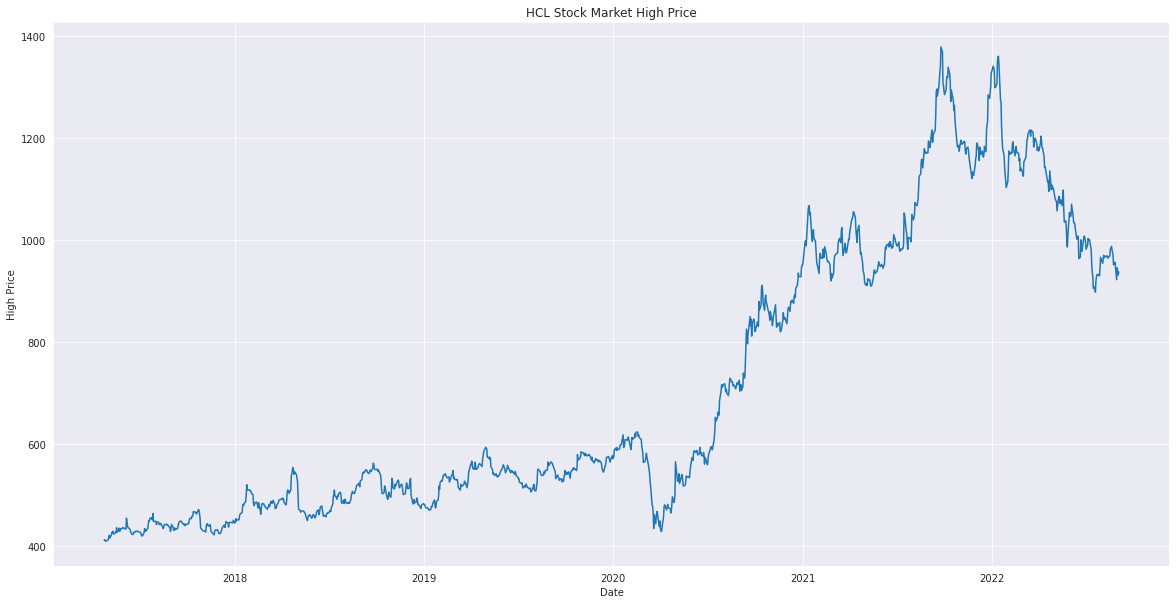

In [29]:
# Visualisasi dataset

import seaborn as sns

plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('HCL Stock Market High Price')
plt.plot(data['High'])
plt.show()

In [34]:
# Uji Stasioneritas Data

#Deklarasi fungsi untuk mengecek stasioneritas data
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

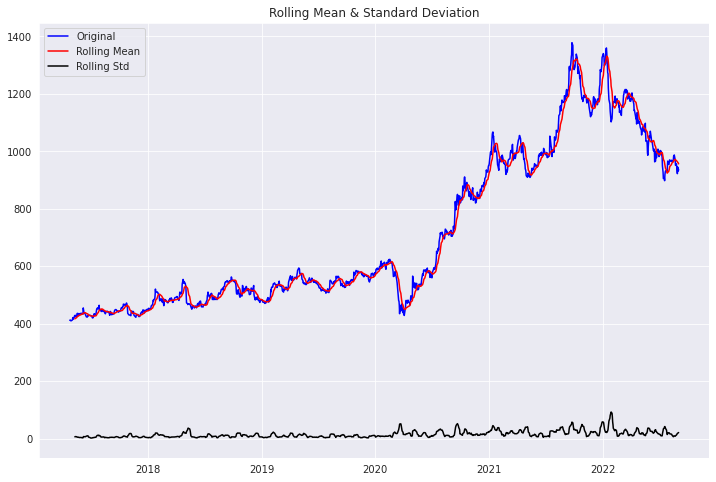

Results of Augmented Dickey-Fuller Test:
Test Statistic: -1.040673571859467
p-value: 0.7381421145120038
Critical Values:
	1%: -3.435359311744588
	5%: -2.863752202145595
	10%: -2.5679477886494775


In [35]:
#Melakukan uji stasioneritas untuk dataset

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Menghitung rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend(loc='best')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    print('Results of Augmented Dickey-Fuller Test:')
    adf_result = adfuller(timeseries, autolag='AIC')
    print(f'Test Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
test_stationarity(ts)


In [36]:
#Menginisialkan variabel High sebagai data time series
ts = data['High']
ts.head(10)

Date
2017-04-24    412.000000
2017-04-25    412.924988
2017-04-26    411.000000
2017-04-27    410.000000
2017-04-28    410.000000
2017-05-02    412.725006
2017-05-03    418.750000
2017-05-04    421.299988
2017-05-05    416.000000
2017-05-08    422.500000
Name: High, dtype: float64

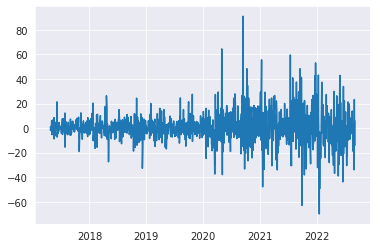

In [37]:
#Differencing untuk memperoleh data yang stasioner
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

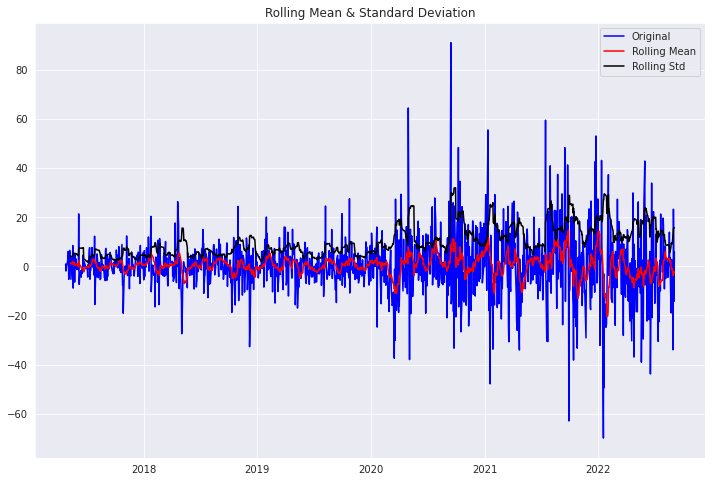

Results of Augmented Dickey-Fuller Test:
Test Statistic: -8.263827693481517
p-value: 5.000030664449258e-13
Critical Values:
	1%: -3.435359311744588
	5%: -2.863752202145595
	10%: -2.5679477886494775


In [38]:
#Uji stasioneritas data setelah differencing
test_stationarity(ts_diff_1)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


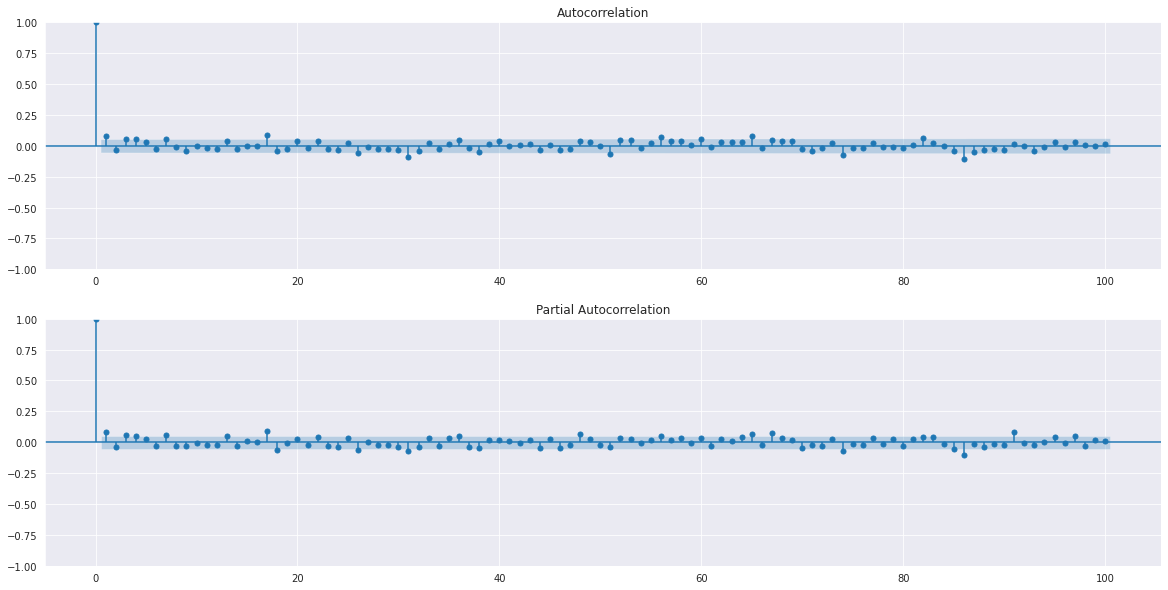

In [40]:
#Visualisasi ACF dan PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(20,10))
plt.subplot(211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=100)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=100)
plt.show()


In [58]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load data
df = pd.read_csv("HCLTECH.csv")

# Define parameter values for ARIMA
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

# Split data into train and test sets
train_size = int(len(df) * 0.7)               
train, test = df[0:train_size], df[train_size:]

# Define a function to evaluate the performance of each combination of p, d, and q values
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate each combination of p, d, and q values using the above function
best_score, best_cfg = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                rmse = evaluate_arima_model(train, test, order)
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
                print('ARIMA%s RMSE=%.3f' % (order,rmse))
            except:
                continue
print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


Best ARIMANone RMSE=inf


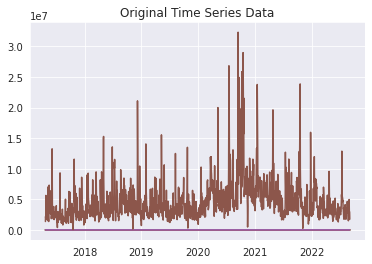

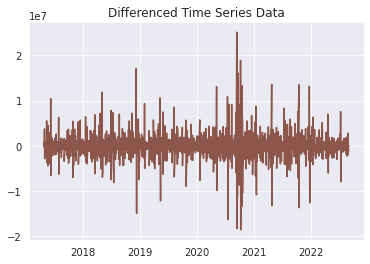

In [59]:
import matplotlib.pyplot as plt

# Plot the original time series data
plt.plot(ts)
plt.title('Original Time Series Data')
plt.show()

# Plot the differenced time series data
plt.plot(diff)
plt.title('Differenced Time Series Data')
plt.show()


In [68]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load data
data = pd.read_csv('HCLTECH.csv', parse_dates=['Date'], index_col='Date')

# Ambil kolom 'Close' dan ubah ke tipe float
ts = data['Close'].astype(float)

# ADF test
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# Differencing jika data tidak stasioner
if result[1] > 0.05:
    diff = ts.diff().dropna()
else:
    diff = ts
    
# Fit ARIMA model with order (1, 1, 1)
model = ARIMA(diff, order=(1,1,1))
results_ARIMA = model.fit()

# Prediksi untuk 4 hari ke depan
predictions = results_ARIMA.forecast(steps=4)

# Tampilkan hasil prediksi
print(predictions)


ADF Statistic: -1.035913
p-value: 0.739941
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
1326    0.383364
1327    0.388049
1328    0.388060
1329    0.388060
Name: predicted_mean, dtype: float64


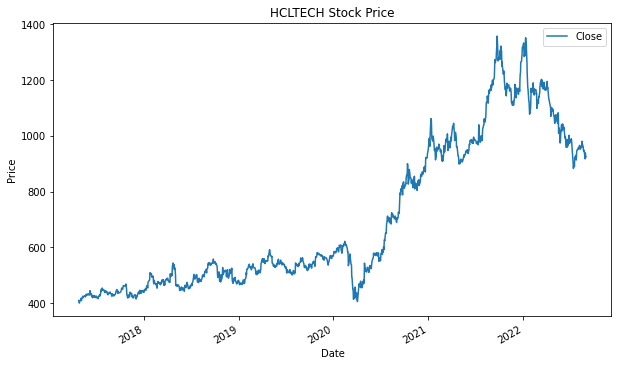

In [8]:
# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df.plot(figsize=(10, 6))
plt.ylabel('Price')
plt.title('HCLTECH Stock Price')
plt.show()

In [13]:
# Test stationarity
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


In [14]:
#Determine number of differences

kpss_diffs = ndiffs(df['Close'], alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df['Close'], alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)
print("Number of differences determined by KPSS test: ", kpss_diffs)
print("Number of differences determined by ADF test: ", adf_diffs)
print("Total number of differences: ", n_diffs)

Number of differences determined by KPSS test:  1
Number of differences determined by ADF test:  1
Total number of differences:  1


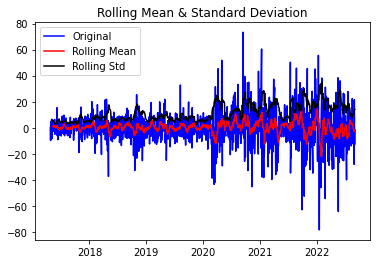

Results of Dickey-Fuller Test:
Test Statistic                  -20.708435
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    1323.000000
Critical Value (1%)              -3.435302
Critical Value (5%)              -2.863727
Critical Value (10%)             -2.567934
dtype: float64


In [15]:
#First difference

df_diff = df.diff().dropna()
test_stationarity(df_diff['Close'])

In [16]:
#Auto ARIMA model

from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], d=n_diffs, start_p=1, start_q=1,
max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
error_action='warn', trace=True, suppress_warnings=True,
stepwise=True, random_state=20, n_fits=30)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=10605.164, Time=2.56 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10608.803, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=10610.601, Time=0.83 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=10610.580, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10607.950, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=10605.911, Time=0.48 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=10605.779, Time=4.38 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=10607.161, Time=6.96 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=10605.173, Time=1.54 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=10607.390, Time=16.51 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=10610.581, Time=0.84 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=10605.122, Time=2.79 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=10605.264, Time=0.77 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=10605.618, Time=4.17 sec
 ARI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1327
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -5298.087
Date:                            Tue, 14 Mar 2023   AIC                          10604.173
Time:                                    08:24:02   BIC                          10624.933
Sample:                                         0   HQIC                         10611.955
                                           - 1327                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8524      0.070    -12.170      0.000      -0.990      -0.715
ma.L1          0.8920      0.061     14.675      0.000       0.773       1.011
ma.S.L12       0.0475      0.023      2.100      0.036       0.003       0.092
sigma2       172.9789      3.877     44.616      0.000     165.380     180.578
===================================================================================
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):              1015.30
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               5.53   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

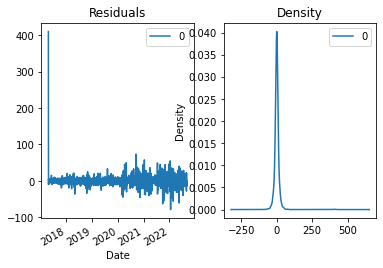

In [17]:
#Model diagnostics

residuals = pd.DataFrame(model.resid())
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()